# Sorting - A practical exercise

# Objectives

The aim of this notebook is to help you understand different sorting algorithms and their performance. There is a lot of code in the notebook that you do not need to worry about. The only things you should worry about are the 3 sorting algorithms you will have to implement. These are:
- Bubble sort
- Insertion sort
- Merge sort

Do not worry if you cannot complete these in the lesson. They are purely for you to get a bit more experience with different sorting algorithms. If you are really interested, these notebooks are accessible from home as well.

# Helper functions

Here we define a collection of functions that will be useful for the rest of the exercise. You do not need to worry about these functions.

You'll need to run this cell to get started.

In [1]:
# so our plots get drawn in the notebook
%matplotlib inline
from matplotlib import pyplot as plt
from random import randint
from time import clock
from random import randrange
import numpy as np
from utils import time_f, reject_outliers

def time_sorts(lower, upper, steps, sorts, sort_labels):
    # Create a list with lists of times for each sorting algorithm
    times = [[] for _ in range(len(sorts) + 1)]
    
    # Loop to a list of size n
    for i in range(lower, upper, steps):
        # Apply each sort 
        for sort_index, sort in enumerate(sorts):
            unavg_time = []
            # Average the time over 100 sorts of the list
            for j in range(100):
                rand_list_temp = [randrange(0, 2000) for _ in range(i)]
                runtime = time_f(lambda: sort(rand_list_temp))
                unavg_time.append(runtime)
            
            # Calculate and save the average runtime (without outliers)
            unavg_time = reject_outliers(unavg_time)
            avg_runtime = sum(unavg_time) / len(unavg_time)
            times[sort_index].append(avg_runtime)
    return times

def benchmark_sorts(sorts, lower, upper, steps):
    # Get list of sort names
    sort_labels = [sort.__name__ for sort in sorts]
    # Calculate sort times
    times = time_sorts(lower, upper, steps, sorts, sort_labels)
    
    # Plot each sorting algorithm with its name
    for index, sort_label in enumerate(sort_labels):
        plt.plot(range(lower, upper, steps), times[index], label=sort_label)
        
    # Add axis labels and legend
    plt.xlabel('n')
    plt.ylabel('time (/s)')
    plt.legend(sort_labels)
    
    plt.show()

def test_sort(sort_func):
    
    n = 100
    x = [randint(0, n) for _ in range(n)]

    sort_name = sort_func.__name__
    if is_sorted(sort_func(x)):
        print(sort_name + " works!")
    else:
        print(sort_name + " has failed.")

def is_sorted(l):
    return all([l[i] <= l[i+1] for i in range(len(l)-1)])


## Task 1: Bubble Sort

In this task you are asked to implement `bubble_sort`. You have been provided with test cases to see if your implementation works. Do not change the function defintion. Make sure you return the sorted array even if you choose to sort in place.

In [2]:
def bubble_sort(a):
    for _ in a:
        for i in range(len(a)-1):
            if a[i] > a[i+1]:
                a[i], a[i+1] = a[i+1], a[i]
                    
    return a

Run this test to confirm your implementation is correct. Do not edit the test cases.

In [3]:
test_sort(bubble_sort)

bubble_sort works!


## Task 2: Insertion Sort

In this task you are asked to implement `insertion_sort`. You have been provided with test cases to see if your implementation works. Do not change the function defintion. Make sure you return the sorted array even if you choose to sort in place.

In [4]:
def insertion_sort(a):
    # Loop through list with index
    for i, item in enumerate(a):
        
        # The current position of our item
        pos = i
        
        while pos > 0 and a[pos - 1] > item:
            a[pos] = a[pos - 1]
            pos -= 1
        
        a[pos] = item
    return a

Run this test to confirm your implementation is correct. Do not edit the test cases.

In [5]:
test_sort(insertion_sort)


insertion_sort works!


## Task 3: Merge Sort

In this task you are asked to implement `merge_sort`. You have been provided with test cases to see if your implementation works. Do not change the function defintion. Make sure you return the sorted array even if you choose to sort in place.

In [6]:
def merge_sort(list):
    # Base case of singleton list
    if len(list) == 1:
        return list

    # Midpoint of the list
    n = len(list)
    k = int(n / 2)

    # Merge sort the two halves
    sub_list_1 = merge_sort(list[0:k])
    sub_list_2 = merge_sort(list[k:n])

    # Merge the two sorted lists
    return merge(sub_list_1, sub_list_2)


def merge(list1, list2):
    # Add the sentinel to the end
    list1.append(float('inf'))
    list2.append(float('inf'))

    # The new list to be returned
    merged_list = []

    # Iterate through non-sentinel elements
    for _ in range(1, len(list1) + len(list2) - 1):
        if list1[0] < list2[0] :
            merged_list.append(list1.pop(0))
        else:
            merged_list.append(list2.pop(0))

    return merged_list

Use this test to confirm your implementation is correct.

In [7]:
test_sort(merge_sort)

merge_sort works!


## Task 4: Quick sort

In this task you are asked to implement `quick_sort`. You have been provided with test cases to see if your implementation works. Do not change the function defintion. Make sure you return the sorted array even if you choose to sort in place. This is extremely challenging so it has been broken down into helper functions for you.

In [8]:
def quick_sort(a):
    # Call a helper function
    # O is the index of the first element yet to be sorted.
    # len(a) - 1 is the index of the last element yet to be sorted
    return q_sort(a, 0, len(a)-1)


def q_sort(array, begin, end):
    # If single element to be sorted
    if begin >= end:
        return array
    
    # Move smaller elements before the pivot and larger elements after
    # Returns new location of the pivot
    pivot = partition(array, begin, end)
    
    # Sort the sublists on either side
    q_sort(array, begin, pivot - 1)
    q_sort(array, pivot + 1, end)
    
    return array


def partition(array, begin, end):
    # The index the pivot element will be (number of items smaller than the pivot)
    piv_pos = begin
    
    for i in range(begin + 1, end + 1):
        if array[i] <= array[begin]:
            # Move the position of the pivot to the right
            piv_pos += 1
            # Move smaller element to the left of the (new) pivot position
            # Item in new pivot position was greater than old pivot position
            array[i], array[piv_pos] = array[piv_pos], array[i]
    
    # Move the pivot value into pivot position
    array[piv_pos], array[begin] = array[begin], array[piv_pos]
    return piv_pos

Use this to test if your implementation is correct.

In [9]:
test_sort(quick_sort)

quick_sort works!


# Analysing the running time performance of bubble sort, insertion_sort and merge_sort

Here we will compare the running times of insertion sort, bubble sort, and merge sort. You do not need to make any modifications to this code. Just run the code below.

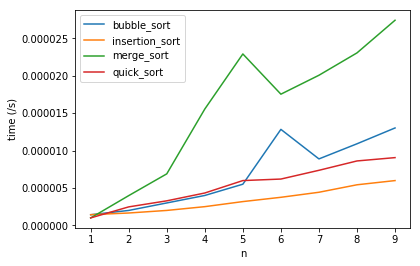

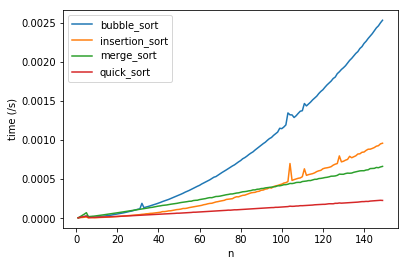

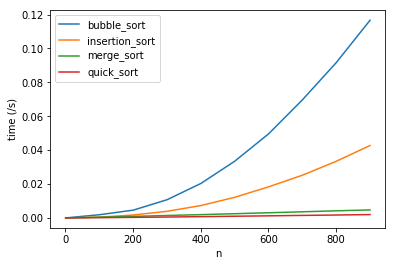

In [10]:
all_sorts = [bubble_sort, insertion_sort, merge_sort, quick_sort]
benchmark_sorts(all_sorts, 1, 10, 1)
benchmark_sorts(all_sorts, 1, 150, 1)
benchmark_sorts(all_sorts, 1, 1000, 100)

You may notice that insertion sort performs better than merge sort for small lists. This is despite merge sort having a theoretically faster run time! If you want to know why, come speak to me!

# Never write your own sort!

Although we've just seen how you can, it's important to note that you should never write your own sort! This is because the inbuilt sort often makes use of extremely advanced features that make it faster than something we could write.

In [11]:
def inbuilt_sort(a):
    return a.sort()

Run the benchmark below to see the performance difference!

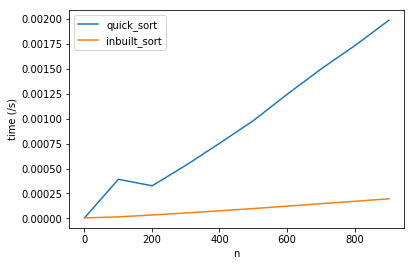

In [12]:
benchmark_sorts([quick_sort, inbuilt_sort], 1, 1000, 100)